In [58]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch

In [59]:
csv_path1 = r".\data\500_anonymized_Reddit_users_posts_labels - 500_anonymized_Reddit_users_posts_labels.csv"
df1 = pd.read_csv(csv_path1)
df1

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation
...,...,...,...
495,user-495,"['Its not the end, it just feels that way. Or ...",Supportive
496,user-496,"['It was a skype call, but she ended it and Ve...",Indicator
497,user-497,['That sounds really weird.Maybe you were Dist...,Supportive
498,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt


In [60]:
print(df1.info())
print(df1.dtypes)
print(df1.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    500 non-null    object
 1   Post    500 non-null    object
 2   Label   500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
None
User     object
Post     object
Label    object
dtype: object
User     500
Post     500
Label      5
dtype: int64


In [61]:
df1["Label"].unique()

array(['Supportive', 'Ideation', 'Behavior', 'Attempt', 'Indicator'],
      dtype=object)

In [62]:
df1["Label"].value_counts()

Label
Ideation      171
Supportive    108
Indicator      99
Behavior       77
Attempt        45
Name: count, dtype: int64

In [63]:
label_map = {
    "Supportive": "1",
    "Ideation": "-1",
    "Behavior": "0",
    "Attempt": "-1",
    "Indicator": "0"
}

df1["Sentiment"] = df1["Label"].map(label_map)

In [64]:
df1

,User,Post,Label,Sentiment
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive,1
1,user-1,['It can be hard to appreciate the notion that...,Ideation,-1
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior,0
3,user-3,['I tried to kill my self once and failed badl...,Attempt,-1
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation,-1
...,...,...,...,...
495,user-495,"['Its not the end, it just feels that way. Or ...",Supportive,1
496,user-496,"['It was a skype call, but she ended it and Ve...",Indicator,0
497,user-497,['That sounds really weird.Maybe you were Dist...,Supportive,1
498,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt,-1


In [65]:
df1 = df1.drop(columns=["User","Label"])

In [66]:
df1 = df1.rename(columns={"Post": "Text"})


In [67]:
print(df1['Text'])

0      ['Its not a viable option, and youll be leavin...
1      ['It can be hard to appreciate the notion that...
2      ['Hi, so last night i was sitting on the ledge...
3      ['I tried to kill my self once and failed badl...
4      ['Hi NEM3030. What sorts of things do you enjo...
                             ...                        
495    ['Its not the end, it just feels that way. Or ...
496    ['It was a skype call, but she ended it and Ve...
497    ['That sounds really weird.Maybe you were Dist...
498    ['Dont know there as dumb as it sounds I feel ...
499    ['&gt;It gets better, trust me.Ive spent long ...
Name: Text, Length: 500, dtype: object


In [68]:
df1['Text'] = df1['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df1['Text']

0      Its not a viable option and youll be leaving y...
1      It can be hard to appreciate the notion that y...
2      Hi so last night i was sitting on the ledge of...
3      I tried to kill my self once and failed badly ...
4      Hi NEM3030 What sorts of things do you enjoy d...
                             ...                        
495    Its not the end it just feels that way Or at l...
496    It was a skype call but she ended it and Ventr...
497    That sounds really weirdMaybe you were Distrac...
498    Dont know there as dumb as it sounds I feel Hy...
499    gtIt gets better trust meIve spent long enough...
Name: Text, Length: 500, dtype: object

In [69]:
df1

,Text,Sentiment
0,Its not a viable option and youll be leaving y...,1
1,It can be hard to appreciate the notion that y...,-1
2,Hi so last night i was sitting on the ledge of...,0
3,I tried to kill my self once and failed badly ...,-1
4,Hi NEM3030 What sorts of things do you enjoy d...,-1
...,...,...
495,Its not the end it just feels that way Or at l...,1
496,It was a skype call but she ended it and Ventr...,0
497,That sounds really weirdMaybe you were Distrac...,1
498,Dont know there as dumb as it sounds I feel Hy...,-1


In [70]:
csv_path2 = r".\data\Combined Data.csv"
df2 = pd.read_csv(csv_path2)

print(df2.info())
print(df2.dtypes)
print(df2.nunique())
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
Unnamed: 0     int64
statement     object
status        object
dtype: object
Unnamed: 0    53043
statement     51073
status            7
dtype: int64


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [71]:
df2 = df2.dropna()

In [72]:
df2["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [73]:
label_map = {
    "Anxiety": "-1",
    "Normal": "1",
    "Depression": "-1",
    "Suicidal": "-1",
    "Stress": "-1",
    "Bipolar": "-1",
    "Personality disorder": "-1"
}

df2["Sentiment"] = df2["status"].map(label_map)

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\3487573731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sentiment"] = df2["status"].map(label_map)


In [74]:
df2.drop(columns=["Unnamed: 0", "status"], inplace=True)

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\676293515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=["Unnamed: 0", "status"], inplace=True)


In [75]:
df2 = df2.rename(columns={"statement": "Text"})
df2

,Text,Sentiment
0,oh my gosh,-1
1,"trouble sleeping, confused mind, restless hear...",-1
2,"All wrong, back off dear, forward doubt. Stay ...",-1
3,I've shifted my focus to something else but I'...,-1
4,"I'm restless and restless, it's been a month n...",-1
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,-1
53039,"selfishness ""I don't feel very good, it's lik...",-1
53040,Is there any way to sleep better? I can't slee...,-1
53041,"Public speaking tips? Hi, all. I have to give ...",-1


In [76]:
df2['Text'] = df2['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df2['Text']

0                                               oh my gosh
1        trouble sleeping confused mind restless heart ...
2        All wrong back off dear forward doubt Stay in ...
3        Ive shifted my focus to something else but Im ...
4        Im restless and restless its been a month now ...
                               ...                        
53038    Nobody takes me seriously Ive 24M dealt with d...
53039    selfishness  I dont feel very good its like I ...
53040    Is there any way to sleep better I cant sleep ...
53041    Public speaking tips Hi all I have to give a p...
53042    I have really bad door anxiety Its not about b...
Name: Text, Length: 52681, dtype: object

In [77]:
df2

,Text,Sentiment
0,oh my gosh,-1
1,trouble sleeping confused mind restless heart ...,-1
2,All wrong back off dear forward doubt Stay in ...,-1
3,Ive shifted my focus to something else but Im ...,-1
4,Im restless and restless its been a month now ...,-1
...,...,...
53038,Nobody takes me seriously Ive 24M dealt with d...,-1
53039,selfishness I dont feel very good its like I ...,-1
53040,Is there any way to sleep better I cant sleep ...,-1
53041,Public speaking tips Hi all I have to give a p...,-1


In [78]:
csv_path3 = r".\data\COVID19_support_post_features_tfidf_256.csv"
df3 = pd.read_csv(csv_path3)

print(df3.info())
print(df3.dtypes)
print(df3.nunique())
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Columns: 350 entries, subreddit to tfidf_year
dtypes: float64(270), int64(76), object(4)
memory usage: 2.6+ MB
None
subreddit                       object
author                          object
date                            object
post                            object
automated_readability_index    float64
                                ...   
tfidf_wors                     float64
tfidf_would                    float64
tfidf_wrong                    float64
tfidf_x200b                    float64
tfidf_year                     float64
Length: 350, dtype: object
subreddit                        1
author                         981
date                            58
post                           981
automated_readability_index    978
                              ... 
tfidf_wors                     116
tfidf_would                    283
tfidf_wrong                     36
tfidf_x200b                     48
tfidf_

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,COVID19_support,thatreddittherapist,2020/02/15,"Welcome to COVID19 Support! Hi everyone,\n\nI'...",9.341417,9.238381,8.578618,67.262223,59.609756,11.959475,...,0.0,0.0,0.0,0.059225,0.082616,0.0,0.000000,0.0,0.000000,0.000000
1,COVID19_support,daisy7895528,2020/02/20,Deadman Walking I have Type 2 diabetes and am ...,10.375234,14.460109,7.220383,62.353939,60.869159,11.382804,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.126704
2,COVID19_support,Varakari,2020/02/21,"Constructive Action, Not Pink Glasses There is...",6.023668,9.237107,5.690609,72.257547,71.131980,8.609554,...,0.0,0.0,0.0,0.000000,0.103938,0.0,0.000000,0.0,0.248724,0.000000
3,COVID19_support,ToxicSamurai,2020/02/26,One way I dealt with pandemic panic from SARS-...,9.449293,6.979039,8.541308,75.186932,61.009569,11.202764,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.090860,0.0,0.000000,0.000000
4,COVID19_support,readyheartsx,2020/02/27,No one around me cares about the COVID19 virus...,-3.395227,-2.115623,-0.876061,111.058636,111.500000,2.181818,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,COVID19_support,alexsmith2332,2020/04/20,Creating a collection of stories of how people...,11.632591,11.115781,9.903744,60.952069,55.275862,12.975369,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.201489,0.0,0.000000,0.000000
977,COVID19_support,Murrivel,2020/04/20,Has anyone else decided to abandon/temporarily...,9.002277,8.116806,8.293941,71.577545,60.683168,11.248317,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
978,COVID19_support,S_Lang,2020/04/20,"Youth Strategies to Stay Home Hi, I work in yo...",4.978800,6.997976,4.105800,87.889900,70.200000,7.240000,...,0.0,0.0,0.0,0.079856,0.000000,0.0,0.000000,0.0,0.000000,0.000000
979,COVID19_support,ChristmasChan,2020/04/20,question about stimulus package and unemployme...,4.944840,6.190281,5.828010,78.523938,69.214724,8.859749,...,0.0,0.0,0.0,0.257780,0.000000,0.0,0.188651,0.0,0.000000,0.000000


In [79]:
csv_path4 = r".\data\Dataset_Suicidal_Sentiment.csv"
df4 = pd.read_csv(csv_path4)

print(df4.info())
print(df4.dtypes)
print(df4.nunique())
df4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226953 entries, 0 to 226952
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       226953 non-null  int64 
 1   Post             226895 non-null  object
 2   Suicidal_label   226953 non-null  int64 
 3   Sentiment_label  226953 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.9+ MB
None
Unnamed: 0          int64
Post               object
Suicidal_label      int64
Sentiment_label     int64
dtype: object
Unnamed: 0         226953
Post               226703
Suicidal_label          2
Sentiment_label         3
dtype: int64


,Unnamed: 0,Post,Suicidal_label,Sentiment_label
0,0,Ex Wife Threatening SuicideRecently I left my ...,0,0
1,1,Am I weird I don t get affected by compliments...,1,1
2,2,Finally is almost over So I can never hear ...,1,0
3,3,i need helpjust help me im crying so hard,0,0
4,4,I m so lostHello my name is Adam and I ve b...,0,0
...,...,...,...,...
226948,227680,I sound like a dudebro but I can t handle my f...,0,0
226949,227681,Fuck my sister She is such I fucking bitch and...,1,0
226950,227682,I ve been suicidal for years and no one knowsT...,0,1
226951,227683,My boyfriend is sick so I took some Polaroids ...,1,0


In [80]:
df4.dropna(inplace=True)

In [81]:
label_map = {
    1 : -1,
    0 : 0
}

df4["Sentiment"] = df4["Suicidal_label"].map(label_map)

In [82]:
df4

,Unnamed: 0,Post,Suicidal_label,Sentiment_label,Sentiment
0,0,Ex Wife Threatening SuicideRecently I left my ...,0,0,0
1,1,Am I weird I don t get affected by compliments...,1,1,-1
2,2,Finally is almost over So I can never hear ...,1,0,-1
3,3,i need helpjust help me im crying so hard,0,0,0
4,4,I m so lostHello my name is Adam and I ve b...,0,0,0
...,...,...,...,...,...
226948,227680,I sound like a dudebro but I can t handle my f...,0,0,0
226949,227681,Fuck my sister She is such I fucking bitch and...,1,0,-1
226950,227682,I ve been suicidal for years and no one knowsT...,0,1,0
226951,227683,My boyfriend is sick so I took some Polaroids ...,1,0,-1


In [83]:
df4 = df4.drop(columns=["Unnamed: 0", "Suicidal_label", "Sentiment_label"])

In [84]:
df4 = df4.rename(columns={"Post": "Text"})
df4

,Text,Sentiment
0,Ex Wife Threatening SuicideRecently I left my ...,0
1,Am I weird I don t get affected by compliments...,-1
2,Finally is almost over So I can never hear ...,-1
3,i need helpjust help me im crying so hard,0
4,I m so lostHello my name is Adam and I ve b...,0
...,...,...
226948,I sound like a dudebro but I can t handle my f...,0
226949,Fuck my sister She is such I fucking bitch and...,-1
226950,I ve been suicidal for years and no one knowsT...,0
226951,My boyfriend is sick so I took some Polaroids ...,-1


In [85]:
df4['Text'] = df4['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df4['Text']

0         Ex Wife Threatening SuicideRecently I left my ...
1         Am I weird I don t get affected by compliments...
2         Finally   is almost over  So I can never hear ...
3                 i need helpjust help me im crying so hard
4         I m so lostHello  my name is Adam   and I ve b...
                                ...                        
226948    I sound like a dudebro but I can t handle my f...
226949    Fuck my sister She is such I fucking bitch and...
226950    I ve been suicidal for years and no one knowsT...
226951    My boyfriend is sick so I took some Polaroids ...
226952    What would happen to my dog  M What would happ...
Name: Text, Length: 226895, dtype: object

In [86]:
csv_path5 = r".\data\Depression.csv"
df5 = pd.read_csv(csv_path5)

print(df5.info())
print(df5.dtypes)
print(df5.nunique())
df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       4577 non-null   int64 
 1   TEXT        4573 non-null   object
 2   Unnamed: 2  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 107.4+ KB
None
Label          int64
TEXT          object
Unnamed: 2    object
dtype: object
Label            1
TEXT          4307
Unnamed: 2       1
dtype: int64


,Label,TEXT,Unnamed: 2
0,1,I was once a kind romantic who strove to help ...,NaN
1,1,! I wake up every day thinking why am I living...,NaN
2,1,I have problems with my girlfriend. I cannot b...,NaN
3,1,"My whole life is one continuous hell, in which...",NaN
4,1,I want to sleep and not wake up. Every day the...,NaN
...,...,...,...
4572,1,I have lost everything ... there is no homelan...,NaN
4573,1,It is very hard mentally. On the eve of the Ne...,NaN
4574,1,"At first, the people around me, in the person ...",NaN
4575,1,", I really need help, otherwise I feel that I ...",NaN


In [87]:
df5["Label"].unique()

array([1])

In [88]:
df5.drop(columns=["Unnamed: 2"], inplace=True)
df5 = df5.rename(columns={"TEXT": "Text"})


In [89]:
df5 = df5.rename(columns={"Label": "Sentiment"})

In [90]:
label_map = {
    1 : -1
}

df5["Sentiment"] = df5["Sentiment"].map(label_map)

In [91]:
new_order = ['Text', 'Sentiment']

# Oszlopok sorrendjének módosítása
df5 = df5[new_order]
df5

,Text,Sentiment
0,I was once a kind romantic who strove to help ...,-1
1,! I wake up every day thinking why am I living...,-1
2,I have problems with my girlfriend. I cannot b...,-1
3,"My whole life is one continuous hell, in which...",-1
4,I want to sleep and not wake up. Every day the...,-1
...,...,...
4572,I have lost everything ... there is no homelan...,-1
4573,It is very hard mentally. On the eve of the Ne...,-1
4574,"At first, the people around me, in the person ...",-1
4575,", I really need help, otherwise I feel that I ...",-1


In [92]:
df5['Text'] = df5['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df5['Text']

0       I was once a kind romantic who strove to help ...
1        I wake up every day thinking why am I living ...
2       I have problems with my girlfriend I cannot be...
3       My whole life is one continuous hell in which ...
4       I want to sleep and not wake up Every day the ...
                              ...                        
4572    I have lost everything  there is no homeland c...
4573    It is very hard mentally On the eve of the New...
4574    At first the people around me in the person of...
4575     I really need help otherwise I feel that I wi...
4576    Do not want to live I was doing well before Sh...
Name: Text, Length: 4577, dtype: object

In [93]:
csv_path6 = r".\data\depression_data_extra_final.csv"
df6 = pd.read_csv(csv_path6)

print(df6.info())
print(df6.dtypes)
print(df6.nunique())
df6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Columns: 287 entries, clean_text to depression_level
dtypes: float64(282), int64(4), object(1)
memory usage: 16.9+ MB
None
clean_text           object
wa                  float64
like                float64
feel                float64
know                float64
                     ...   
homework            float64
hey                 float64
sentiment           float64
is_depression         int64
depression_level      int64
Length: 287, dtype: object
clean_text          7624
wa                    27
like                  16
feel                  16
know                  15
                    ... 
homework               4
hey                    3
sentiment           2625
is_depression          2
depression_level       3
Length: 287, dtype: int64


,clean_text,wa,like,feel,know,want,life,get,time,even,...,internet,ill,playing,headache,totally,homework,hey,sentiment,is_depression,depression_level
0,understand people reply immediately op invitat...,0.000000,0.133333,0.000000,0.090909,0.181818,0.00,0.133333,0.000000,0.10,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.9973,1,2
1,welcome r depression check post place take mom...,0.000000,0.066667,0.000000,0.060606,0.090909,0.00,0.066667,0.047619,0.00,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.9591,1,2
2,anyone else instead sleeping depressed stay ni...,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4397,1,2
3,kind stuffed around lot life delaying inevitab...,0.043478,0.066667,0.055556,0.030303,0.000000,0.05,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8066,1,2
4,sleep greatest comforting escape whenever wake...,0.000000,0.066667,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3760,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,snow,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0
7727,moulin rouge mad cry,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7430,0,0
7728,trying shout find people list,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0
7729,ughh find red sox hat gotta wear creepy nick p...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0


In [94]:
df6.dropna()

,clean_text,wa,like,feel,know,want,life,get,time,even,...,internet,ill,playing,headache,totally,homework,hey,sentiment,is_depression,depression_level
0,understand people reply immediately op invitat...,0.000000,0.133333,0.000000,0.090909,0.181818,0.00,0.133333,0.000000,0.10,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.9973,1,2
1,welcome r depression check post place take mom...,0.000000,0.066667,0.000000,0.060606,0.090909,0.00,0.066667,0.047619,0.00,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.9591,1,2
2,anyone else instead sleeping depressed stay ni...,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4397,1,2
3,kind stuffed around lot life delaying inevitab...,0.043478,0.066667,0.055556,0.030303,0.000000,0.05,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8066,1,2
4,sleep greatest comforting escape whenever wake...,0.000000,0.066667,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3760,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,snow,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0
7727,moulin rouge mad cry,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7430,0,0
7728,trying shout find people list,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0
7729,ughh find red sox hat gotta wear creepy nick p...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0


In [95]:
keep_cols = ["clean_text", "is_depression"]

# A DataFrame leszűkítése ezekre az oszlopokra
df6 = df6[keep_cols]


In [96]:
label_map = {
    1 : -1,
    0 : 0
}

df6["Sentiment"] = df6["is_depression"].map(label_map)

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\3759943923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["Sentiment"] = df6["is_depression"].map(label_map)


In [97]:
df6 = df6.rename(columns={"clean_text": "Text"})
df6 = df6.drop(columns=["is_depression"])

In [98]:
new_order = ['Text', 'Sentiment']

# Oszlopok sorrendjének módosítása
df6 = df6[new_order]
df6

,Text,Sentiment
0,understand people reply immediately op invitat...,-1
1,welcome r depression check post place take mom...,-1
2,anyone else instead sleeping depressed stay ni...,-1
3,kind stuffed around lot life delaying inevitab...,-1
4,sleep greatest comforting escape whenever wake...,-1
...,...,...
7726,snow,0
7727,moulin rouge mad cry,0
7728,trying shout find people list,0
7729,ughh find red sox hat gotta wear creepy nick p...,0


In [99]:
df6['Text'] = df6['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df6['Text']

0       understand people reply immediately op invitat...
1       welcome r depression check post place take mom...
2       anyone else instead sleeping depressed stay ni...
3       kind stuffed around lot life delaying inevitab...
4       sleep greatest comforting escape whenever wake...
                              ...                        
7726                                                 snow
7727                                 moulin rouge mad cry
7728                        trying shout find people list
7729    ughh find red sox hat gotta wear creepy nick p...
7730    slept wonderfully finally tried swatching new ...
Name: Text, Length: 7731, dtype: object

In [100]:
csv_path7 = r".\data\file1.csv"
df7 = pd.read_csv(csv_path7)

print(df7.info())
print(df7.dtypes)
print(df7.nunique())
df7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB
None
Unnamed: 0     int64
text          object
class         object
dtype: object
Unnamed: 0    10000
text           9998
class             2
dtype: int64


,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide
...,...,...,...
9995,72380,teenag femal like decis teenag femal make movi...,non-suicide
9996,62872,watch english teacher crash burn highlight mor...,non-suicide
9997,115556,controli feel like everyon tell live day day c...,suicide
9998,128606,keep nightmar trigger warn nightmar 1 stitch a...,non-suicide


In [101]:
df7 = df7.dropna()
df7

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide
...,...,...,...
9995,72380,teenag femal like decis teenag femal make movi...,non-suicide
9996,62872,watch english teacher crash burn highlight mor...,non-suicide
9997,115556,controli feel like everyon tell live day day c...,suicide
9998,128606,keep nightmar trigger warn nightmar 1 stitch a...,non-suicide


In [102]:
label_map={
    "suicide": -1,
    "non-suicide":0
}
df7["Sentiment"] = df7["class"].map(label_map)
df7 = df7.rename(columns={"text": "Text"})
df7 = df7.drop(columns=["Unnamed: 0", "class"])

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\2262828359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["Sentiment"] = df7["class"].map(label_map)


In [103]:
df7

,Text,Sentiment
0,dont know7 month self harm free urg get strong...,-1
1,start becom rich start compani becom 16 afford...,0
2,poem haiku umegamedev hi hello hello stop fuck...,0
3,ive honestli got idea anymoreit feel everyon f...,-1
4,ever cri like think unfair life cri cant cri e...,0
...,...,...
9995,teenag femal like decis teenag femal make movi...,0
9996,watch english teacher crash burn highlight mor...,0
9997,controli feel like everyon tell live day day c...,-1
9998,keep nightmar trigger warn nightmar 1 stitch a...,0


In [104]:
df7['Text'] = df7['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df7['Text']

0       dont know7 month self harm free urg get strong...
1       start becom rich start compani becom 16 afford...
2       poem haiku umegamedev hi hello hello stop fuck...
3       ive honestli got idea anymoreit feel everyon f...
4       ever cri like think unfair life cri cant cri e...
                              ...                        
9995    teenag femal like decis teenag femal make movi...
9996    watch english teacher crash burn highlight mor...
9997    controli feel like everyon tell live day day c...
9998    keep nightmar trigger warn nightmar 1 stitch a...
9999                 im lone bore need someon talk im 14m
Name: Text, Length: 9999, dtype: object

In [105]:
csv_path8 = r".\data\final_teen_mental_health_chatbot_dataset (1).csv"
df8 = pd.read_csv(csv_path8)

print(df8.info())
print(df8.dtypes)
print(df8.nunique())
df8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_input    287 non-null    object
 1   bot_response  287 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB
None
user_input      object
bot_response    object
dtype: object
user_input      278
bot_response    287
dtype: int64


,user_input,bot_response
0,I feel really sad today,I'm so sorry to hear that. Can you share what’...
1,I’m stressed about exams,That sounds overwhelming. Let’s talk about wha...
2,I feel anxious,I hear you. It’s okay to feel anxious sometime...
3,My friends don’t talk to me anymore,That must hurt. I'm here for you. Want to talk...
4,I’m so tired of everything,I'm really sorry you're feeling this way. You'...
...,...,...
282,I had fun in art class,Art’s fire! What’d you make?
283,I’m feeling good today,That’s awesome! What’s the vibe?
284,My friend sent a funny meme,Memes are life! What was it about?
285,I’m excited for the show,Shows are fire! What’s it about?


In [106]:
csv_path9 = r".\data\IMDB Dataset.csv"
df9 = pd.read_csv(csv_path9)

print(df9.info())
print(df9.dtypes)
print(df9.nunique())
df9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       object
sentiment    object
dtype: object
review       49582
sentiment        2
dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [107]:
label_map = {
    "positive": "1",
    "negative": "-1"
}
df9["Sentiment"] = df9["sentiment"].map(label_map)
df9 = df9.drop(columns=["sentiment"])
df9 = df9.rename(columns={"review": "Text"})
df9

,Text,Sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,-1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",-1
49997,I am a Catholic taught in parochial elementary...,-1
49998,I'm going to have to disagree with the previou...,-1


In [108]:
df9['Text'] = df9['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df9['Text']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: Text, Length: 50000, dtype: object

In [109]:
csv_path10 = r".\data\Mental-Health-Twitter.csv"
df10 = pd.read_csv(csv_path10)

print(df10.info())
print(df10.dtypes)
print(df10.nunique())
df10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB
None
Unnamed: 0       int64
post_id          int64
post_created    object
post_text       object
user_id          int64
followers        int64
friends          int64
favourites       int64
statuses         int64
retweets         int64
label            int64
dtype: object
Unnamed: 0      20000
p

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [110]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mihal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [111]:
sia = SentimentIntensityAnalyzer()

In [112]:
def vader_polarity(text):
    score = sia.polarity_scores(str(text))  # stringgé alakítjuk
    comp = score["compound"]
    if comp >= 0.05:
        return 1
    elif comp <= -0.05:
        return -1
    else:
        return 0

In [113]:
df10["Sentiment"] = df10["post_text"].apply(vader_polarity)

In [114]:
df10 = df10.rename(columns={"post_text": "Text"})

In [115]:
new_order = ['Text', 'Sentiment']

# Oszlopok sorrendjének módosítása
df10 = df10[new_order]
df10

,Text,Sentiment
0,It's just over 2 years since I was diagnosed w...,0
1,"It's Sunday, I need a break, so I'm planning t...",0
2,Awake but tired. I need to sleep but my brain ...,-1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1
...,...,...
19995,A day without sunshine is like night.,-1
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",-1
19997,The flow chart is a most thoroughly oversold p...,0
19998,"Ships are safe in harbor, but they were never ...",1


In [116]:
df10['Text'] = df10['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df10['Text']

0        Its just over 2 years since I was diagnosed wi...
1        Its Sunday I need a break so Im planning to sp...
2        Awake but tired I need to sleep but my brain h...
3        RT SewHQ Retro bears make perfect gifts and ar...
4        Its hard to say whether packing lists are maki...
                               ...                        
19995                 A day without sunshine is like night
19996    Borens Laws 1 When in charge ponder 2 When in ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor but they were never m...
19999        Black holes are where God is dividing by zero
Name: Text, Length: 20000, dtype: object

In [117]:
csv_path11 = r".\data\merged_data.csv"
df11 = pd.read_csv(csv_path11)

print(df11.info())
print(df11.dtypes)
print(df11.nunique())
df11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60162 entries, 0 to 60161
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60162 non-null  int64 
 1   sentiment   60162 non-null  int64 
 2   time        60162 non-null  object
 3   tweet       60161 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB
None
Unnamed: 0     int64
sentiment      int64
time          object
tweet         object
dtype: object
Unnamed: 0    60162
sentiment         2
time          30302
tweet         59479
dtype: int64


,Unnamed: 0,sentiment,time,tweet
0,0,0,08:32:48,Me too 😞
1,1,0,20:20:54,bad but ill be fine 🙃
2,2,0,06:22:59,*you
3,3,0,05:36:51,Me irl\n#rt & #follo\n#picture #thoughts #hent...
4,4,0,09:13:20,Same for you ❤️
...,...,...,...,...
60157,60157,0,09:59:47,omg i really just dont feel like studying! !!!
60158,60158,0,09:59:48,"S_T_R_E_T_C_H_........I love Sundays! Crap, I..."
60159,60159,0,09:59:48,now sitting at the Atlanta airport waiting for...
60160,60160,0,09:59:52,"I hate going to the library when it's closed, ..."


In [118]:
df11 = df11.dropna()

In [119]:
df11["sentiment"].unique()

array([0, 1])

In [120]:
texts = df11.loc[df11["sentiment"] == 0, "tweet"].tolist()


In [121]:
texts

['Me too 😞',
 'bad but ill be fine 🙃',
 '*you',
 'Me irl\n#rt & #follo\n#picture #thoughts #hentai #harem #memes #anxiety #depression #anime #SuicideGirls #girls #IRL #sexy @sadpiixie @cuttingquote @sosadtoday @Iostutopia @arjmxrell @depressionarmy @waybeyondbroken @depressedandcut @alonestfeeIs @Just_Invisiblex @scars_thoughts pic.twitter.com/vN5TWPMkDj',
 'Same for you ❤️',
 '...',
 'I know it does just keep fighting',
 'Felt that',
 'it does get better.',
 'about the same',
 'fucked up hbu?',
 'Same',
 'Me\n#rt & #follo\n#anime #depression #anxiety #me #hentai #water #beach #pool #2girls #thicc #bikini @sadpiixie @BuriedInSorrow @ityaadie @Dimitricelinta2 @diefeelinqs @O_T_hentaipics @C_depressed @arjmxrell @Iostutopia @BeyondBrokenDep @depressedandcut @waybeyondbroken @sosadtoday pic.twitter.com/zpsIYjGkaX',
 'I really really wanna cut rn.',
 'How are you ?',
 ':D',
 'I’m so so so sorry everyone. I will work hard on getting back to everyone hopefully by tomorrow night! (It’s 8:30pm

In [122]:
label_map = {
    1: 1,
    0: -1
}
df11["Sentiment"] = df11["sentiment"].map(label_map)
df11 = df11.drop(columns=["Unnamed: 0", "time"])
df11 = df11.rename(columns={"tweet": "Text"})

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\494419818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["Sentiment"] = df11["sentiment"].map(label_map)


In [123]:
df11 = df11.drop(columns=["sentiment"])

In [124]:
df11

,Text,Sentiment
0,Me too 😞,-1
1,bad but ill be fine 🙃,-1
2,*you,-1
3,Me irl\n#rt & #follo\n#picture #thoughts #hent...,-1
4,Same for you ❤️,-1
...,...,...
60157,omg i really just dont feel like studying! !!!,-1
60158,"S_T_R_E_T_C_H_........I love Sundays! Crap, I...",-1
60159,now sitting at the Atlanta airport waiting for...,-1
60160,"I hate going to the library when it's closed, ...",-1


In [125]:
df11["Sentiment"].unique()

array([-1,  1])

In [126]:
csv_path12 = r".\data\Neutral.csv"
df12 = pd.read_csv(csv_path12, encoding="mac_roman")

print(df12.info())
print(df12.dtypes)
print(df12.nunique())
df12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6074 entries, 0 to 6073
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   1893 non-null   float64
 1   TEXT    6065 non-null   object 
dtypes: float64(1), object(1)
memory usage: 95.0+ KB
None
Label    float64
TEXT      object
dtype: object
Label       1
TEXT     6059
dtype: int64


,Label,TEXT
0,0.0,TIL the movie Starship Troopers was never adap...
1,0.0,What do you call a fat baby?
2,0.0,Two morons are sitting on a fence. The big one...
3,0.0,I covered all my weapons in glue.
4,0.0,Joke I made up: Caveman and a bear walk into a...
...,...,...
6069,NaN,Perfect. Thank you. Enjoy your sunday of no work
6070,NaN,haha. It does have a nice ring to it (: Lets ...
6071,NaN,Hahah. Love them!
6072,NaN,jass warn me b4 u go to nxt war...i am there ...


In [127]:
df12 = df12.dropna()
df12 = df12.rename(columns={"Label": "Sentiment", "TEXT":"Text"})
cols=["Text", "Sentiment"]
df12 = df12[cols]
df12

,Text,Sentiment
0,TIL the movie Starship Troopers was never adap...,0.0
1,What do you call a fat baby?,0.0
2,Two morons are sitting on a fence. The big one...,0.0
3,I covered all my weapons in glue.,0.0
4,Joke I made up: Caveman and a bear walk into a...,0.0
...,...,...
1888,It's a complex complex complex.EDIT: THANK YOU...,0.0
1889,He is now a seasoned veteran,0.0
1890,"'Ah, men'",0.0
1891,The dog - at least he will shut up once he's i...,0.0


In [128]:
df12['Text'] = df12['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df12['Text']

0       TIL the movie Starship Troopers was never adap...
1                             What do you call a fat baby
2       Two morons are sitting on a fence The big one ...
3                        I covered all my weapons in glue
4       Joke I made up Caveman and a bear walk into a ...
                              ...                        
1888    Its a complex complex complexEDIT THANK YOU KI...
1889                         He is now a seasoned veteran
1890                                               Ah men
1891    The dog  at least he will shut up once hes ins...
1892    She prayed dear lord I pray for mommy and dadd...
Name: Text, Length: 1893, dtype: object

In [129]:
csv_path13 = r".\data\Pos_Neut_Neg.csv"
df13 = pd.read_csv(csv_path13)

print(df13.info())
print(df13.dtypes)
print(df13.nunique())
df13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB
None
textID       object
text         object
sentiment    object
dtype: object
textID       27481
text         27480
sentiment        3
dtype: int64


,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive
27479,ed167662a5,But it was worth it ****.,positive


In [130]:
label_map = {
    "positive": 1,
    "negative": -1,
    "neutral": 0
}
df13["Sentiment"] = df13["sentiment"].map(label_map)
df13 = df13.drop(columns=["textID", "sentiment"])
df13 = df13.rename(columns={"text": "Text"})
df13

,Text,Sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1
...,...,...
27476,wish we could come see u on Denver husband l...,-1
27477,I`ve wondered about rake to. The client has ...,-1
27478,Yay good for both of you. Enjoy the break - y...,1
27479,But it was worth it ****.,1


In [131]:
df13 = df13.dropna()

In [132]:
df13

,Text,Sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1
...,...,...
27476,wish we could come see u on Denver husband l...,-1
27477,I`ve wondered about rake to. The client has ...,-1
27478,Yay good for both of you. Enjoy the break - y...,1
27479,But it was worth it ****.,1


In [133]:
csv_path14 = r".\data\processedSuicidedata_sentiment.csv"
df14 = pd.read_csv(csv_path14)

print(df14.info())
print(df14.dtypes)
print(df14.nunique())
df14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231991 entries, 0 to 231990
Columns: 287 entries, Unnamed: 0 to class
dtypes: float64(280), int64(5), object(2)
memory usage: 508.0+ MB
None
Unnamed: 0      int64
text           object
wa            float64
like          float64
feel          float64
               ...   
totally       float64
homework      float64
hey           float64
sentiment     float64
class          object
Length: 287, dtype: object
Unnamed: 0    231991
text          231743
wa                 4
like              47
feel              28
               ...  
totally            7
homework          10
hey               14
sentiment      16254
class              2
Length: 287, dtype: int64


,Unnamed: 0,text,wa,like,feel,know,want,life,get,time,...,must,internet,ill,playing,headache,totally,homework,hey,sentiment,class
0,2,ex wife threatening suiciderecently left wife ...,0.0,0.000000,0.000000,0.014925,0.000000,0.000000,0.000517,0.000,...,0.0,0.000000,0.037037,0.0,0.0,0.0,0.0,0.0,-0.9802,suicide
1,3,weird dont get affected compliments coming som...,0.0,0.000000,0.014706,0.014925,0.000000,0.000000,0.000517,0.000,...,0.0,0.017857,0.000000,0.0,0.0,0.0,0.0,0.0,0.1727,non-suicide
2,4,finally 2020 almost never hear 2020 bad year e...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.2651,non-suicide
3,8,need helpjust help im crying hard,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.2023,suicide
4,9,im losthello name adam 16 ive struggling years...,0.0,0.006897,0.029412,0.000000,0.000000,0.010870,0.000517,0.050,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.9957,suicide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231986,348103,dont like rock going get anything go,0.0,0.006897,0.000000,0.000000,0.000000,0.000000,0.000517,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.2755,non-suicide
231987,348106,tell many friends lonely everything deprived p...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.3612,non-suicide
231988,348107,pee probably tastes like salty tea someone dra...,0.0,0.006897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.3612,non-suicide
231989,348108,usual stuff find hereim posting sympathy pity ...,0.0,0.034483,0.000000,0.074627,0.015504,0.065217,0.001550,0.025,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.3931,suicide


In [134]:
cols = ["text", "class"]
df14 = df14[cols]
labels_map = {
  "suicide": -1,
  "non-suicide": 0
 }
df14["Sentiment"] = df14["class"].map(labels_map)
df14.drop(columns=["class"], inplace=True)
df14=df14.rename(columns={"text":"Text"})
df14

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\2960012837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14["Sentiment"] = df14["class"].map(labels_map)
C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\2960012837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14.drop(columns=["class"], inplace=True)


,Text,Sentiment
0,ex wife threatening suiciderecently left wife ...,-1
1,weird dont get affected compliments coming som...,0
2,finally 2020 almost never hear 2020 bad year e...,0
3,need helpjust help im crying hard,-1
4,im losthello name adam 16 ive struggling years...,-1
...,...,...
231986,dont like rock going get anything go,0
231987,tell many friends lonely everything deprived p...,0
231988,pee probably tastes like salty tea someone dra...,0
231989,usual stuff find hereim posting sympathy pity ...,-1


In [135]:
csv_path15 = r".\data\Reddit_mental_health_posts.csv"
df15 = pd.read_csv(csv_path15)

print(df15.info())
print(df15.dtypes)
print(df15.nunique())
df15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4686 non-null   object 
 1   title         4686 non-null   object 
 2   text          4659 non-null   object 
 3   score         4686 non-null   int64  
 4   upvote_ratio  4686 non-null   float64
 5   created_utc   4686 non-null   float64
 6   num_comments  4686 non-null   int64  
 7   subreddit     4686 non-null   object 
 8   url           4686 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 329.6+ KB
None
id               object
title            object
text             object
score             int64
upvote_ratio    float64
created_utc     float64
num_comments      int64
subreddit        object
url              object
dtype: object
id              4686
title           4593
text            4623
score            222
upvote_ratio      80
created_utc     4

,id,title,text,score,upvote_ratio,created_utc,num_comments,subreddit,url
0,1mcgad6,this version of earth sucks,we couldn't have built a better hell if we tried,1,1.00,1.753807e+09,0,depression,https://www.reddit.com/r/depression/comments/1...
1,1mcfscy,How depression effected my life,"I'm 25, and have never worked a day in my life...",1,1.00,1.753806e+09,2,depression,https://www.reddit.com/r/depression/comments/1...
2,1mcfrs4,I miss feeling like I’m more than depressed to...,I try my best not to be overbearing or constan...,1,1.00,1.753806e+09,0,depression,https://www.reddit.com/r/depression/comments/1...
3,1mcf75w,Am I Suffering from depression ?,Today I realized I might be going through depr...,2,1.00,1.753805e+09,0,depression,https://www.reddit.com/r/depression/comments/1...
4,1mcf3ov,I HATE sharing a room with my sister,I absolutely despise a room with my sister she...,1,0.67,1.753804e+09,6,depression,https://www.reddit.com/r/depression/comments/1...
...,...,...,...,...,...,...,...,...,...
4681,1m5bnwz,I’ve lost my soul and I know it,I don’t care about anything real anymore. All ...,0,0.50,1.753080e+09,7,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...
4682,1m5beqr,I feel guilty because the main reason I want t...,I (25f) had a crush on my best friend (26m) at...,12,0.74,1.753079e+09,9,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...
4683,1m5bced,Im mad at my friend with the same problem as me,My best friend and i are both trans men. And n...,0,0.36,1.753079e+09,4,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...
4684,1m5aqz0,I don’t want to be human anymore,It all just hurts to much and there is nothing...,13,0.88,1.753077e+09,12,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...


In [136]:
df15["upvote_ratio"].unique()

array([1.  , 0.67, 0.6 , 0.75, 0.84, 0.5 , 0.88, 0.92, 0.93, 0.81, 0.86,
       0.83, 0.97, 0.98, 0.66, 0.76, 0.72, 0.9 , 0.95, 0.87, 0.91, 0.4 ,
       0.57, 0.85, 0.79, 0.14, 0.43, 0.96, 0.99, 0.94, 0.33, 0.8 , 0.25,
       0.89, 0.78, 0.69, 0.68, 0.82, 0.56, 0.58, 0.17, 0.71, 0.77, 0.29,
       0.63, 0.44, 0.64, 0.2 , 0.22, 0.7 , 0.45, 0.55, 0.13, 0.65, 0.53,
       0.38, 0.52, 0.73, 0.47, 0.62, 0.15, 0.35, 0.3 , 0.42, 0.74, 0.31,
       0.41, 0.27, 0.32, 0.51, 0.54, 0.18, 0.48, 0.1 , 0.59, 0.37, 0.19,
       0.39, 0.11, 0.36])

In [137]:
df15["Sentiment"] = np.where(df15["upvote_ratio"] >= 0.5, -1, 0)

In [138]:
cols = ["text", "Sentiment"]
df15 = df15[cols]
df15 = df15.rename(columns={"text": "Text"})
df15

,Text,Sentiment
0,we couldn't have built a better hell if we tried,-1
1,"I'm 25, and have never worked a day in my life...",-1
2,I try my best not to be overbearing or constan...,-1
3,Today I realized I might be going through depr...,-1
4,I absolutely despise a room with my sister she...,-1
...,...,...
4681,I don’t care about anything real anymore. All ...,-1
4682,I (25f) had a crush on my best friend (26m) at...,-1
4683,My best friend and i are both trans men. And n...,0
4684,It all just hurts to much and there is nothing...,-1


In [139]:
df15['Text'] = df15['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df15['Text']

0         we couldnt have built a better hell if we tried
1       Im 25 and have never worked a day in my life I...
2       I try my best not to be overbearing or constan...
3       Today I realized I might be going through depr...
4       I absolutely despise a room with my sister she...
                              ...                        
4681    I dont care about anything real anymore All th...
4682    I 25f had a crush on my best friend 26m at one...
4683    My best friend and i are both trans men And na...
4684    It all just hurts to much and there is nothing...
4685    I was accused of being Transgender using the f...
Name: Text, Length: 4686, dtype: object

In [140]:
csv_path16 = r".\data\Simba_tweets.csv"
df16 = pd.read_csv(csv_path16)

print(df16.info())
print(df16.dtypes)
print(df16.nunique())
df16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   tweet_id_str  1000 non-null   int64 
 2   date_time     1000 non-null   object
 3   location      755 non-null    object
 4   tweet_text    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None
Unnamed: 0       int64
tweet_id_str     int64
date_time       object
location        object
tweet_text      object
dtype: object
Unnamed: 0      1000
tweet_id_str    1000
date_time        995
location         584
tweet_text       975
dtype: int64


,Unnamed: 0,tweet_id_str,date_time,location,tweet_text
0,0,1465539276729470976,2021-11-30 04:32:46,Ethereum,"sad , reality live ... #vaccinemandate #pfizer..."
1,1,1465538501257093124,2021-11-30 04:29:41,"Charlotte, NC",many sad stories like one !
2,2,1465536814685507596,2021-11-30 04:22:59,"Boston, MA",slow suicide
3,3,1465536791822303235,2021-11-30 04:22:54,Nazi free USA,nazi scum profiting hospitalizations deaths ga...
4,4,1465536577875197957,2021-11-30 04:22:03,"Pennsylvania, USA",people literally anything avoid admitting effe...
...,...,...,...,...,...
995,995,1465023563342176267,2021-11-28 18:23:30,NY,im really happy bts able see army person im ki...
996,996,1465022784304660481,2021-11-28 18:20:25,USA,"omg , picture #sdcc2021 sad. fuck covid."
997,997,1465021526940557315,2021-11-28 18:15:25,Palliser Triangle,"havent sad gasps air , since upset without cha..."
998,998,1465021466437685248,2021-11-28 18:15:11,"Houston, TX",dad best man passed away suddenly unexpectedly...


In [141]:
csv_path17 = r".\data\Suicadal_tendencies_data.csv"
df17 = pd.read_csv(csv_path17, encoding="mac_roman")

print(df17.info())
print(df17.dtypes)
print(df17.nunique())
df17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   7066 non-null   int64 
 1   TEXT    7061 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.5+ KB
None
Label     int64
TEXT     object
dtype: object
Label       1
TEXT     5680
dtype: int64


,Label,TEXT
0,2,I don't know what to do with my life
1,2,I think it's tonight.
2,2,Day 1: Realizations
3,2,I'm writing a story were somebody is talked ou...
4,2,Idk. Help. I guess.
...,...,...
7061,2,"To (you, my love)I'm sorry about the things I'..."
7062,2,My girlfriend has recently started cutting hea...
7063,2,I had an NDE in 2009 after an ATV accident and...
7064,2,"Just simply, Why not?"


In [142]:
df17 = df17.dropna()
labels_map={
    2:-1
}
df17["Sentiment"] = df17["Label"].map(labels_map)
cols=["TEXT", "Sentiment"]
df17 = df17[cols]
df17 = df17.rename(columns={"TEXT": "Text"})
df17

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\2608759687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17["Sentiment"] = df17["Label"].map(labels_map)


,Text,Sentiment
0,I don't know what to do with my life,-1
1,I think it's tonight.,-1
2,Day 1: Realizations,-1
3,I'm writing a story were somebody is talked ou...,-1
4,Idk. Help. I guess.,-1
...,...,...
7061,"To (you, my love)I'm sorry about the things I'...",-1
7062,My girlfriend has recently started cutting hea...,-1
7063,I had an NDE in 2009 after an ATV accident and...,-1
7064,"Just simply, Why not?",-1


In [143]:
csv_path18 = r".\data\Suicide_Detection.csv"
df18 = pd.read_csv(csv_path18)

print(df18.info())
print(df18.dtypes)
print(df18.nunique())
df18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB
None
Unnamed: 0     int64
text          object
class         object
dtype: object
Unnamed: 0    232074
text          232074
class              2
dtype: int64


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [144]:
labels_map={
    "suicide": -1,
    "non-suicide": 0
}
df18["Sentiment"] = df18["class"].map(labels_map)
df18 = df18.drop(columns=["Unnamed: 0", "class"])
df18 = df18.rename(columns={"text": "Text"})
df18

,Text,Sentiment
0,Ex Wife Threatening SuicideRecently I left my ...,-1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,-1
4,"I’m so lostHello, my name is Adam (16) and I’v...",-1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,-1


In [145]:
csv_path19 = r".\data\Suicide_Ideation_Dataset(Twitter-based).csv"
df19 = pd.read_csv(csv_path19)

print(df19.info())
print(df19.dtypes)
print(df19.nunique())
df19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB
None
Tweet      object
Suicide    object
dtype: object
Tweet      1777
Suicide       2
dtype: int64


,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


In [146]:
df19["Suicide"].unique()

array(['Not Suicide post', 'Potential Suicide post '], dtype=object)

In [147]:
df19 = df19.dropna()
labels={
    "Not Suicide post": 0,
    "Potential Suicide post ": -1
}
df19["Sentiment"]=df19["Suicide"].map(labels)
df19 = df19.drop(columns=["Suicide"])
df19=df19.rename(columns={"Tweet": "Text"})
df19

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\3100732069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19["Sentiment"]=df19["Suicide"].map(labels)


,Text,Sentiment
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,-1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,0
1783,Starting my day out with a positive attitude! ...,0
1784,"@belledame222 Hey, it's 5 am...give a girl som...",0
1785,2 drunken besties stumble into my room and we ...,0


In [148]:
df19['Text'] = df19['Text'].str.replace(r'\B@\w+', '', regex=True)
df19['Text']

0                                       making some lunch
1                                     You want his money.
2        that crap took me forever to put together. iâ...
3        #kiwitweets Hey Jer! Since when did you start...
4       Trying out &quot;Delicious Library 2&quot; wit...
                              ...                        
1782      i have forgotten how much i love my Nokia N95-1
1783    Starting my day out with a positive attitude! ...
1784     Hey, it's 5 am...give a girl some credit for ...
1785    2 drunken besties stumble into my room and we ...
1786     &quot;I friggin love you!!!&quot; -Ron Burgun...
Name: Text, Length: 1785, dtype: object

In [149]:
csv_path20 = r".\data\suicide_watch.csv"
df20 = pd.read_csv(csv_path20)

print(df20.info())
print(df20.dtypes)
print(df20.nunique())
df20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Columns: 106 entries, approved_at_utc to is_suicide
dtypes: bool(28), float64(34), int64(9), object(35)
memory usage: 622.2+ KB
None
approved_at_utc    float64
subreddit           object
selftext            object
author_fullname     object
saved                 bool
                    ...   
num_crossposts       int64
media              float64
is_video              bool
author_cakeday      object
is_suicide           int64
Length: 106, dtype: object
approved_at_utc      0
subreddit            1
selftext           934
author_fullname    881
saved                1
                  ... 
num_crossposts       1
media                0
is_video             1
author_cakeday       1
is_suicide           1
Length: 106, dtype: int64


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,is_suicide
0,NaN,SuicideWatch,We've been seeing a worrying increase in pro-s...,t2_1t70,False,NaN,1,False,New wiki on how to avoid accidentally encourag...,[],...,NaN,True,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.567526e+09,0,NaN,False,NaN,1
1,NaN,SuicideWatch,"Activism, i.e. advocating or fundraising for s...",t2_1t70,False,NaN,0,False,Please remember that NO ACTIVISM of any kind i...,[],...,NaN,True,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.631232e+09,0,NaN,False,NaN,1
2,NaN,SuicideWatch,"I was raped when I was two, and neutered in th...",t2_uc4yx9zcb,False,NaN,0,False,"I was raped when I was two, and I find women r...",[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709669e+09,0,NaN,False,NaN,1
3,NaN,SuicideWatch,It's an inherently awful place full of disgust...,t2_vfx9r2c4,False,NaN,0,False,I'm sick of being labelled mentally ill becaus...,[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709676e+09,0,NaN,False,NaN,1
4,NaN,SuicideWatch,I’m planning to kill myself on 16th April whic...,t2_29nae5uz,False,NaN,0,False,As a 17 year old boy I’m planning to kill myse...,[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709651e+09,0,NaN,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,NaN,SuicideWatch,my feelings don’t matter. its all in my fuckin...,t2_q1oe8gao,False,NaN,0,False,ty to my gf,[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709477e+09,0,NaN,False,NaN,1
973,NaN,SuicideWatch,I have my physics board exam tomorrow and I'll...,t2_uvs96p9w0,False,NaN,0,False,I need some words of affirmation,[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709463e+09,0,NaN,False,NaN,1
974,NaN,SuicideWatch,"I had a tough childhood, and I didn't really r...",t2_veoaila22,False,NaN,0,False,Finished,[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709463e+09,0,NaN,False,NaN,1
975,NaN,SuicideWatch,tl;dr i hate living\ni know i posted this exac...,t2_upbfzvynj,False,NaN,0,False,13 and doing it tonight,[],...,NaN,False,https://www.reddit.com/r/SuicideWatch/comments...,466344,1.709690e+09,0,NaN,False,NaN,1


In [150]:
cols = ["selftext", "is_suicide"]
df20 = df20[cols]
df20 = df20.dropna()
labels={
    1:-1
}
df20["Sentiment"]=df20["is_suicide"].map(labels)
df20=df20.drop(columns=["is_suicide"])
df20=df20.rename(columns={"selftext": "Text"})
df20

,Text,Sentiment
0,We've been seeing a worrying increase in pro-s...,-1
1,"Activism, i.e. advocating or fundraising for s...",-1
2,"I was raped when I was two, and neutered in th...",-1
3,It's an inherently awful place full of disgust...,-1
4,I’m planning to kill myself on 16th April whic...,-1
...,...,...
972,my feelings don’t matter. its all in my fuckin...,-1
973,I have my physics board exam tomorrow and I'll...,-1
974,"I had a tough childhood, and I didn't really r...",-1
975,tl;dr i hate living\ni know i posted this exac...,-1


In [151]:
df20

,Text,Sentiment
0,We've been seeing a worrying increase in pro-s...,-1
1,"Activism, i.e. advocating or fundraising for s...",-1
2,"I was raped when I was two, and neutered in th...",-1
3,It's an inherently awful place full of disgust...,-1
4,I’m planning to kill myself on 16th April whic...,-1
...,...,...
972,my feelings don’t matter. its all in my fuckin...,-1
973,I have my physics board exam tomorrow and I'll...,-1
974,"I had a tough childhood, and I didn't really r...",-1
975,tl;dr i hate living\ni know i posted this exac...,-1


In [152]:
df20['Text'] = df20['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df20["Text"]

0      Weve been seeing a worrying increase in prosui...
1      Activism ie advocating or fundraising for soci...
2      I was raped when I was two and neutered in the...
3      Its an inherently awful place full of disgusti...
4      Im planning to kill myself on 16th April which...
                             ...                        
972    my feelings dont matter its all in my fucking ...
973    I have my physics board exam tomorrow and Ill ...
974    I had a tough childhood and I didnt really rea...
975    tldr i hate livingi know i posted this exact s...
976    To be honest it feels as if everything in my l...
Name: Text, Length: 934, dtype: object

In [153]:
csv_path21 = r".\data\test.csv"
df21 = pd.read_csv(csv_path21)

print(df21.info())
print(df21.dtypes)
print(df21.nunique())
df21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      498 non-null    int64 
 1   text    467 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
None
id       int64
text    object
dtype: object
id      498
text    465
dtype: int64


,id,text
0,1,I have to put this in writing somehow so I sti...
1,2,I've made my peace with the fact that I'm goin...
2,3,I really want help now i just cant so this any...
3,4,I can't think of any reason to stay. I have no...
4,5,NaN
...,...,...
493,494,Since I was 9 I felt depressed and almost took...
494,495,I don't know why I'm reaching out now of all t...
495,496,"I dont believe in an afterlife, but i stay up ..."
496,497,"I don't think I actually will kill myself, but..."


In [154]:
csv_path22 = r".\data\testset.csv"
df22 = pd.read_csv(csv_path22)

print(df22.info())
print(df22.dtypes)
print(df22.nunique())
df22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       6372 non-null   int64 
 1   Post             6370 non-null   object
 2   Suicidal_label   6372 non-null   int64 
 3   Sentiment_label  6372 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.3+ KB
None
Unnamed: 0          int64
Post               object
Suicidal_label      int64
Sentiment_label     int64
dtype: object
Unnamed: 0         6372
Post               6370
Suicidal_label        2
Sentiment_label       3
dtype: int64


,Unnamed: 0,Post,Suicidal_label,Sentiment_label
0,0,I ve pushed everyone awayI moved away from my ...,0,0
1,1,Gonna go cook some ramen boys And I don t mean...,1,2
2,2,smilemy father today smiled at me but it looke...,0,0
3,3,I keep being told to be careful by people th...,0,0
4,4,Yoo anyone down to give me some advice or just...,1,0
...,...,...,...,...
6367,6367,If you don t like rock then your not going to ...,1,0
6368,6368,You how you can tell i have so many friends an...,1,1
6369,6369,pee probably tastes like salty tea can someon...,1,0
6370,6370,The usual stuff you find hereI m not posting t...,0,0


In [155]:
df22=df22.dropna()
labels = {
    0: 0,
    1:-1
}
df22["Sentiment"] = df22["Suicidal_label"].map(labels)
df22=df22.drop(columns=["Unnamed: 0","Suicidal_label", "Sentiment_label"])
df22=df22.rename(columns={"Post": "Text"})
df22

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\3310583513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22["Sentiment"] = df22["Suicidal_label"].map(labels)


,Text,Sentiment
0,I ve pushed everyone awayI moved away from my ...,0
1,Gonna go cook some ramen boys And I don t mean...,-1
2,smilemy father today smiled at me but it looke...,0
3,I keep being told to be careful by people th...,0
4,Yoo anyone down to give me some advice or just...,-1
...,...,...
6367,If you don t like rock then your not going to ...,-1
6368,You how you can tell i have so many friends an...,-1
6369,pee probably tastes like salty tea can someon...,-1
6370,The usual stuff you find hereI m not posting t...,0


In [156]:
df22['Text'] = df22['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

In [157]:
csv_path23 = r".\data\train.csv"
df23 = pd.read_csv(csv_path23)

print(df23.info())
print(df23.dtypes)
print(df23.nunique())
df23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object
id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate        

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [158]:
csv_path24 = r".\data\training.1600000.processed.noemoticon.csv"
df24 = pd.read_csv(csv_path24, encoding = "Windows-1252")

print(df24.info())
print(df24.dtypes)
print(df24.nunique())
df24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [159]:
df24["0"].unique()

array([0, 4])

In [160]:
df24.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [161]:
texts1 = df24.loc[df24["0"] == 0, "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"].tolist()

In [162]:
texts1

["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.",
 '@iamjazzyfizz

In [163]:
texts2 = df24.loc[df24["0"] == 4, "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"].tolist()

In [164]:
texts2

['I LOVE @Health4UandPets u guys r the best!! ',
 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!',
 '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ',
 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup',
 '@LovesBrooklyn2 he has that effect on everyone ',
 '@ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk!',
 '@r_keith_hill Thans for your response. Ihad already find this answer ',
 "@KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! ",
 '@tommcfly ah, congrats mr fletcher for finally joining twitter ',
 '@e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors ',
 'crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told m

In [165]:
labels={
    0:0,
    4:1
}
df24["Sentiment"]=df24["0"].map(labels)
df24=df24.rename(columns={
    "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"Text"})
cols=["Text","Sentiment"]
df24=df24[cols]
df24

,Text,Sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,1
1599995,TheWDB.com - Very cool to hear old Walt interv...,1
1599996,Are you ready for your MoJo Makeover? Ask me f...,1
1599997,Happy 38th Birthday to my boo of alll time!!! ...,1


In [175]:
df24['Text'] = df24['Text'].str.replace(r'\B@\w+', '', regex=True)

In [176]:
csv_path25 = r".\data\Train_suicide1.csv"
df25 = pd.read_csv(csv_path25)

print(df25.info())
print(df25.dtypes)
print(df25.nunique())
df25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1597 non-null   object
 1   Suicide  1599 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB
None
Tweet      object
Suicide    object
dtype: object
Tweet      1589
Suicide       2
dtype: int64


,Tweet,Suicide
0,i hate myself so much i want to KILL myself ho...,Potential Suicide post
1,RT @DrugForumsBest: I woke up with a bag over ...,Potential Suicide post
2,i wanna fucking kill myself,Potential Suicide post
3,why do i destroy all my opportunities? am i go...,Potential Suicide post
4,u - understand what the fuck im doing wrong wi...,Potential Suicide post
...,...,...
1594,hi! just joined and i think it's brill! haha s...,Not Suicide post
1595,@WilliamSledd Love the videos William New to t...,Not Suicide post
1596,@itsanimesh I got an Openmoko FreeRunner and n...,Not Suicide post
1597,@PeoplemapsJulie I am looking for the berocca ...,Not Suicide post


In [177]:
df25["Suicide"].unique()

array(['Potential Suicide post ', 'Not Suicide post'], dtype=object)

In [178]:
df25=df25.dropna()
df25=df25.rename(columns={"Tweet":"Text"})
Labels={
    "Potential Suicide post ":-1,
    "Not Suicide post": 0
}
df25["Sentiment"]=df25["Suicide"].map(Labels)
df25.drop(columns="Suicide", inplace=True)
df25

,Text,Sentiment
0,i hate myself so much i want to KILL myself ho...,-1
1,RT @DrugForumsBest: I woke up with a bag over ...,-1
2,i wanna fucking kill myself,-1
3,why do i destroy all my opportunities? am i go...,-1
4,u - understand what the fuck im doing wrong wi...,-1
...,...,...
1594,hi! just joined and i think it's brill! haha s...,0
1595,@WilliamSledd Love the videos William New to t...,0
1596,@itsanimesh I got an Openmoko FreeRunner and n...,0
1597,@PeoplemapsJulie I am looking for the berocca ...,0


In [179]:
df25['Text'] = df25['Text'].str.replace(r'\B@\w+', '', regex=True)
df25['Text']

0       i hate myself so much i want to KILL myself ho...
1       RT : I woke up with a bag over my head after I...
2                             i wanna fucking kill myself
3       why do i destroy all my opportunities? am i go...
4       u - understand what the fuck im doing wrong wi...
                              ...                        
1594    hi! just joined and i think it's brill! haha s...
1595             Love the videos William New to twitter x
1596     I got an Openmoko FreeRunner and now and Andr...
1597     I am looking for the berocca then all will be...
1598     pleasant is right thank u V8 ppl, ur the best!!!
Name: Text, Length: 1597, dtype: object

In [180]:
csv_path26 = r".\data\tweet,intention.csv"
df26 = pd.read_csv(csv_path26)

print(df26.info())
print(df26.dtypes)
print(df26.nunique())
df26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB
None
tweet        object
intention     int64
dtype: object
tweet        8785
intention       2
dtype: int64


,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [181]:
df26["intention"].unique()

array([1, 0])

In [182]:
labels={
    1:-1,
    0:0
}
df26["Sentiment"]=df26["intention"].map(labels)
df26=df26.rename(columns={"tweet":"Text"})
df26=df26.drop(columns=["intention"])
df26

,Text,Sentiment
0,my life is meaningless i just want to end my l...,-1
1,muttering i wanna die to myself daily for a fe...,-1
2,work slave i really feel like my only purpose ...,-1
3,i did something on the 2 of october i overdose...,-1
4,i feel like no one cares i just want to die ma...,-1
...,...,...
9114,have you ever laid on your bed at night and cr...,-1
9115,the fault the blame the pain s still there i m...,-1
9116,stop asking me to trust you when i m still cou...,-1
9117,i never know how to handle sadness crying make...,-1


In [183]:
df26['Text'] = df26['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df26

,Text,Sentiment
0,my life is meaningless i just want to end my l...,-1
1,muttering i wanna die to myself daily for a fe...,-1
2,work slave i really feel like my only purpose ...,-1
3,i did something on the 2 of october i overdose...,-1
4,i feel like no one cares i just want to die ma...,-1
...,...,...
9114,have you ever laid on your bed at night and cr...,-1
9115,the fault the blame the pain s still there i m...,-1
9116,stop asking me to trust you when i m still cou...,-1
9117,i never know how to handle sadness crying make...,-1


In [184]:
csv_path27 = r".\data\Tweets.csv"
df27 = pd.read_csv(csv_path27)

print(df27.info())
print(df27.dtypes)
print(df27.nunique())
df27

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [185]:
cols=["airline_sentiment", "text"]
df27=df27[cols]
labels={
    "positive":1,
    "negative":-1,
    "neutral":0
}
df27["Sentiment"]=df27["airline_sentiment"].map(labels)
df27=df27.drop(columns="airline_sentiment")
df27=df27.rename(columns={"text":"Text"})
df27=df27.dropna()
df27

C:\Users\mihal\AppData\Local\Temp\ipykernel_18952\3567351501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df27["Sentiment"]=df27["airline_sentiment"].map(labels)


,Text,Sentiment
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,-1
4,@VirginAmerica and it's a really big bad thing...,-1
...,...,...
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,-1
14637,@AmericanAir Please bring American Airlines to...,0
14638,"@AmericanAir you have my money, you change my ...",-1


In [186]:
df27['Text'] = df27['Text'].str.replace(r'\B@\w+', '', regex=True)
df27

,Text,Sentiment
0,What said.,0
1,plus you've added commercials to the experien...,1
2,I didn't today... Must mean I need to take an...,0
3,"it's really aggressive to blast obnoxious ""en...",-1
4,and it's a really big bad thing about it,-1
...,...,...
14635,thank you we got on a different flight to Chi...,1
14636,leaving over 20 minutes Late Flight. No warni...,-1
14637,Please bring American Airlines to #BlackBerry10,0
14638,"you have my money, you change my flight, and ...",-1


In [187]:
csv_path28 = r".\data\urban_dictionary.csv"
df28 = pd.read_csv(csv_path28)

print(df28.info())
print(df28.dtypes)
print(df28.nunique())
df28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   definition  4272 non-null   object
 1   word        4272 non-null   object
 2   author      4272 non-null   object
 3   tags        4272 non-null   object
 4   up          4272 non-null   int64 
 5   down        4272 non-null   int64 
 6   date        4272 non-null   object
dtypes: int64(2), object(5)
memory usage: 233.8+ KB
None
definition    object
word          object
author        object
tags          object
up             int64
down           int64
date          object
dtype: object
definition    4168
word          4153
author        3944
tags          2945
up            3340
down          3046
date          2566
dtype: int64


,definition,word,author,tags,up,down,date
0,When a city or town specifically zones an area...,Jizzneyland,whocaresaboutNY,"[u'#jisneyland', u'#gizzneyland', u'#adult zon...",6267,6382,"April 05, 2013"
1,A toilet bowl.,trump basket,jknightx,[],729,634,"March 23, 2017"
2,Excellent health care reserved exclusively for...,wealth care,Davis Finch,"[u'#insurance', u'#rich', u'#america', u'#capi...",1072,625,"May 16, 2008"
3,A dick thing you say to a tall person to piss ...,hows the weather up there,Jackalfu,[],1428,580,"March 20, 2017"
4,"The insane, narcissistic, outrageous asshat wh...",ratfucker,FedupAngryLiberal,"[u'#trump', u'#asshat', u'#scum', u'#asshole',...",1580,2351,"March 18, 2017"
...,...,...,...,...,...,...,...
4267,Verb. Etymology: coming from the modern car tu...,Trick Out,DJ FoxPhyre,[],1553,463,"March 26, 2003"
4268,"(adjective, adverb, interjection) awesome; coi...",jawsome,Diggs,[],1199,1903,"February 17, 2003"
4269,Something socially unacceptable done in a soci...,party foul,Stroll,[],4392,824,"June 28, 2004"
4270,A night when groups of adults get drunk and us...,new year's eve,j-hi,[],3130,1251,"January 07, 2004"


In [189]:
excel_path = r".\data\tweets.xlsx"
excel_content = pd.read_excel(excel_path)
excel_content

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...


In [190]:
txt_path1 = r".\data\psychomotor_problem.txt"
with open(txt_path1, "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

df_txt1 = pd.DataFrame({"Text": lines})
df_txt1["Sentiment"] = -1
df_txt1


,Text,Sentiment
0,walk(ing)? dangerously fast,-1
1,urge to move around,-1
2,(unable|diificult|not able|trouble) to sit still,-1
3,(unable|diificult|not able|trouble) to relax,-1
4,(unable|diificult|not able|trouble) to be calm,-1
...,...,...
104,(annoy) .* i can’?'?t stop moving,-1
105,(am|get) over fidgety,-1
106,"my [a-z]{0,10} is out of control",-1
107,end(ing)? tasks abruptly,-1


In [191]:
df_txt1['Text'] = df_txt1['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df_txt1

,Text,Sentiment
0,walking dangerously fast,-1
1,urge to move around,-1
2,unablediificultnot abletrouble to sit still,-1
3,unablediificultnot abletrouble to relax,-1
4,unablediificultnot abletrouble to be calm,-1
...,...,...
104,annoy i cant stop moving,-1
105,amget over fidgety,-1
106,my az010 is out of control,-1
107,ending tasks abruptly,-1


In [192]:
txt_path2 = r".\data\self-esteem_problem.txt"
with open(txt_path2, "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

df_txt2 = pd.DataFrame({"Text": lines})
df_txt2["Sentiment"] = -1
df_txt2

,Text,Sentiment
0,(i'?m|i am) a (bad|terrible) (friend|student|c...,-1
1,(i'm|i am) (really|very|so) stupid,-1
2,am i a spoiled brat,-1
3,anxious about what everyone will think,-1
4,bad image about myself,-1
...,...,...
96,sorry for all the people i might have,-1
97,struggle to have (self.)?confidence,-1
98,strunggle to have self.?esteem,-1
99,what'?’?s wrong with me,-1


In [193]:
df_txt2['Text'] = df_txt2['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df_txt2

,Text,Sentiment
0,imi am a badterrible friendstudentchildkidboyg...,-1
1,imi am reallyveryso stupid,-1
2,am i a spoiled brat,-1
3,anxious about what everyone will think,-1
4,bad image about myself,-1
...,...,...
96,sorry for all the people i might have,-1
97,struggle to have selfconfidence,-1
98,strunggle to have selfesteem,-1
99,whats wrong with me,-1


In [194]:
txt_path3 = r".\data\self-harm_problem.txt"
with open(txt_path3, "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

df_txt3 = pd.DataFrame({"Text": lines})
df_txt3["Sentiment"] = -1
df_txt3

,Text,Sentiment
0,always had a death wish,-1
1,an ex cutter,-1
2,attempt to suicide,-1
3,attempted suicide,-1
4,back to sh’?'?ing,-1
...,...,...
117,"waste(d)? my life .{0,15}for what",-1
118,why i deserve this treatment,-1
119,will see how long i can last,-1
120,would be better off dead,-1


In [195]:
df_txt3['Text'] = df_txt3['Text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df_txt3

,Text,Sentiment
0,always had a death wish,-1
1,an ex cutter,-1
2,attempt to suicide,-1
3,attempted suicide,-1
4,back to shing,-1
...,...,...
117,wasted my life 015for what,-1
118,why i deserve this treatment,-1
119,will see how long i can last,-1
120,would be better off dead,-1


In [196]:
df = pd.concat([df_txt1, df_txt2, df_txt3, df1, df2, df4, df5, df6, df7, df9, df10, df11, df12, df13, df14, df15, df17, df18, df19, df20, df22, df24, df25, df26, df27], ignore_index=True)

df = df.drop_duplicates(subset=["Text", "Sentiment"])

In [197]:
df =df.dropna()

In [198]:
df

,Text,Sentiment
0,walking dangerously fast,-1
1,urge to move around,-1
2,unablediificultnot abletrouble to sit still,-1
3,unablediificultnot abletrouble to relax,-1
4,unablediificultnot abletrouble to be calm,-1
...,...,...
2572500,thank you we got on a different flight to Chi...,1
2572501,leaving over 20 minutes Late Flight. No warni...,-1
2572502,Please bring American Airlines to #BlackBerry10,0
2572503,"you have my money, you change my flight, and ...",-1


In [199]:
def split_text(row, max_len=512):
    text = row['Text']
    sentiment = row['Sentiment']
    # Ha rövid a szöveg, csak adjuk vissza változatlanul
    if len(text) <= max_len:
        return pd.DataFrame([{'Text': text, 'Sentiment': sentiment}])
    
    # Szöveg szétvágása max_len hosszú darabokra
    chunks = [text[i:i+max_len] for i in range(0, len(text), max_len)]
    return pd.DataFrame([{'Text': chunk, 'Sentiment': sentiment} for chunk in chunks])

# Alkalmazás minden sorra, majd összefűzés
df = pd.concat([split_text(row) for _, row in df.iterrows()], ignore_index=True)

df

,Text,Sentiment
0,walking dangerously fast,-1
1,urge to move around,-1
2,unablediificultnot abletrouble to sit still,-1
3,unablediificultnot abletrouble to relax,-1
4,unablediificultnot abletrouble to be calm,-1
...,...,...
3212221,thank you we got on a different flight to Chi...,1
3212222,leaving over 20 minutes Late Flight. No warni...,-1
3212223,Please bring American Airlines to #BlackBerry10,0
3212224,"you have my money, you change my flight, and ...",-1


In [200]:
df["Sentiment"] = df["Sentiment"].astype("int64")

In [201]:
print("Érzelmi eloszlás:")
print(df["Sentiment"].value_counts())
print("\nArányok:")
print(df["Sentiment"].value_counts(normalize=True))

Érzelmi eloszlás:
Sentiment
 0    1399212
-1     910060
 1     902954
Name: count, dtype: int64

Arányok:
Sentiment
 0    0.435590
-1    0.283311
 1    0.281099
Name: proportion, dtype: float64


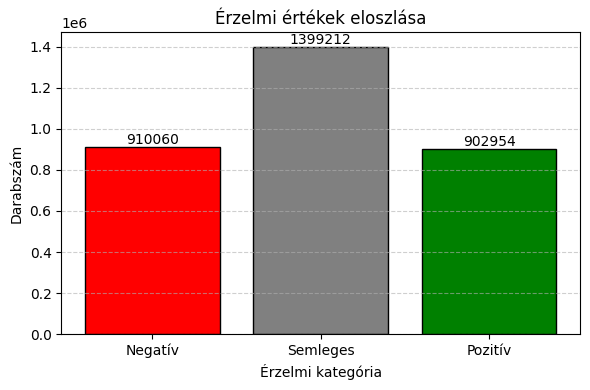

In [202]:
label_names = {-1: "Negatív", 0: "Semleges", 1: "Pozitív"}
plt.figure(figsize=(6, 4))
counts = df["Sentiment"].value_counts().sort_index()
bars = plt.bar(range(len(counts)), counts, color=["red", "gray", "green"], edgecolor="black")

plt.title("Érzelmi értékek eloszlása")
plt.xlabel("Érzelmi kategória")
plt.ylabel("Darabszám")
plt.xticks(ticks=np.arange(len(counts)), labels=[label_names[i] for i in counts.index], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10)
    
plt.tight_layout()
plt.savefig(r".\DATASET.png", dpi=300)
plt.show()

In [203]:
output_path = r".\DATASET.csv"
df.to_csv(output_path, index=False, encoding="utf-8", sep=';')

In [204]:
df_twitter = pd.concat([df11, df13, df14, df17, df18, df19, df24, df25, df27], ignore_index=True)

df_twitter = df_twitter.drop_duplicates(subset=["Text", "Sentiment"])

df_twitter =df_twitter.dropna()

df_twitter["Sentiment"] = df_twitter["Sentiment"].astype("int64")

# Alkalmazás minden sorra, majd összefűzés
df_twitter = pd.concat([split_text(row) for _, row in df_twitter.iterrows()], ignore_index=True)

output_path_twitter = r".\DATASET_twitter.csv"
df_twitter.to_csv(output_path_twitter, index=False, encoding="utf-8", sep=';')

df_twitter

,Text,Sentiment
0,Me too 😞,-1
1,bad but ill be fine 🙃,-1
2,*you,-1
3,Me irl\n#rt & #follo\n#picture #thoughts #hent...,-1
4,Same for you ❤️,-1
...,...,...
2445669,thank you we got on a different flight to Chi...,1
2445670,leaving over 20 minutes Late Flight. No warni...,-1
2445671,Please bring American Airlines to #BlackBerry10,0
2445672,"you have my money, you change my flight, and ...",-1


In [205]:
print("Érzelmi eloszlás:")
print(df_twitter["Sentiment"].value_counts())
print("\nArányok:")
print(df_twitter["Sentiment"].value_counts(normalize=True))

Érzelmi eloszlás:
Sentiment
 0    1077249
 1     803357
-1     565068
Name: count, dtype: int64

Arányok:
Sentiment
 0    0.440471
 1    0.328481
-1    0.231048
Name: proportion, dtype: float64


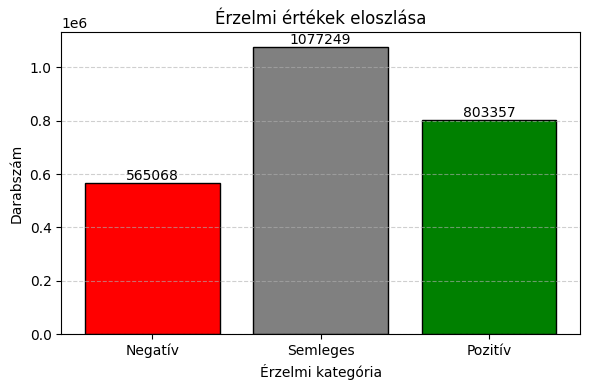

In [206]:
label_names = {-1: "Negatív", 0: "Semleges", 1: "Pozitív"}
plt.figure(figsize=(6, 4))
counts = df_twitter["Sentiment"].value_counts().sort_index()
bars = plt.bar(range(len(counts)), counts, color=["red", "gray", "green"], edgecolor="black")

plt.title("Érzelmi értékek eloszlása")
plt.xlabel("Érzelmi kategória")
plt.ylabel("Darabszám")
plt.xticks(ticks=np.arange(len(counts)), labels=[label_names[i] for i in counts.index], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10)
    
plt.tight_layout()
plt.savefig(r".\DATASET_twitter.png", dpi=300)
plt.show()

In [207]:
df_regular = pd.concat([df_txt1, df_txt2, df_txt3, df1, df2, df4, df5, df6, df7, df9, df10, df12, df15, df20, df22, df26], ignore_index=True)

df_regular = df_regular.drop_duplicates(subset=["Text", "Sentiment"])

df_regular =df_regular.dropna()

df_regular["Sentiment"] = df_regular["Sentiment"].astype("int64")

# Alkalmazás minden sorra, majd összefűzés
df_regular = pd.concat([split_text(row) for _, row in df_regular.iterrows()], ignore_index=True)

output_path_regular = r".\DATASET_regular.csv"
df_regular.to_csv(output_path_regular, index=False, encoding="utf-8", sep=';')

df_regular

,Text,Sentiment
0,walking dangerously fast,-1
1,urge to move around,-1
2,unablediificultnot abletrouble to sit still,-1
3,unablediificultnot abletrouble to relax,-1
4,unablediificultnot abletrouble to be calm,-1
...,...,...
767147,have you ever laid on your bed at night and cr...,-1
767148,the fault the blame the pain s still there i m...,-1
767149,stop asking me to trust you when i m still cou...,-1
767150,i never know how to handle sadness crying make...,-1


In [208]:
print("Érzelmi eloszlás:")
print(df_regular["Sentiment"].value_counts())
print("\nArányok:")
print(df_regular["Sentiment"].value_counts(normalize=True))

Érzelmi eloszlás:
Sentiment
-1    345167
 0    322387
 1     99598
Name: count, dtype: int64

Arányok:
Sentiment
-1    0.449933
 0    0.420239
 1    0.129828
Name: proportion, dtype: float64


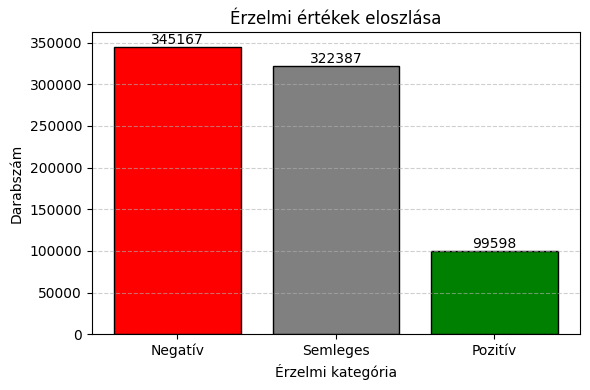

In [209]:
label_names = {-1: "Negatív", 0: "Semleges", 1: "Pozitív"}
plt.figure(figsize=(6, 4))
counts = df_regular["Sentiment"].value_counts().sort_index()
bars = plt.bar(range(len(counts)), counts, color=["red", "gray", "green"], edgecolor="black")

plt.title("Érzelmi értékek eloszlása")
plt.xlabel("Érzelmi kategória")
plt.ylabel("Darabszám")
plt.xticks(ticks=np.arange(len(counts)), labels=[label_names[i] for i in counts.index], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", 
             ha="center", va="bottom", fontsize=10)
    
plt.tight_layout()
plt.savefig(r".\DATASET_regular.png", dpi=300)
plt.show()

In [210]:
# Tokenizer és modell
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

for idx, text in enumerate(df['Text']):
    # Tokenizálás
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    
    attentions = outputs.attentions  # list of tensors: rétegek x (batch, heads, seq_len, seq_len)
    
    # Átlagoljuk az összes head-et és réteget: shape (seq_len, seq_len)
    avg_attention = torch.stack([layer[0].mean(dim=0) for layer in attentions]).mean(dim=0)
    
    # Figyelem a [CLS] tokenre (index 0)
    cls_attention = avg_attention[0]
    
    # Token lista konvertálása
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    
    # [CLS] és [SEP] tokenek eltávolítása
    valid_indices = [i for i, t in enumerate(tokens) if t not in ['[CLS]', '[SEP]']]
    filtered_tokens = [tokens[i] for i in valid_indices]
    
    # A CLS attentionből az érvényes tokenekre figyelünk
    valid_attentions = cls_attention[valid_indices]
    
    # Maximum attention token kiválasztása
    max_idx = torch.argmax(valid_attentions).item()
    most_attended_token = filtered_tokens[max_idx]
    
    print(f"Sor {idx+1}: '{text}'")
    print(f" -> Legnagyobb figyelem: {most_attended_token}\n")


Sor 1: 'walking dangerously fast'
 -> Legnagyobb figyelem: dangerously

Sor 2: 'urge to move around'
 -> Legnagyobb figyelem: urge

Sor 3: 'unablediificultnot abletrouble to sit still'
 -> Legnagyobb figyelem: unable

Sor 4: 'unablediificultnot abletrouble to relax'
 -> Legnagyobb figyelem: relax

Sor 5: 'unablediificultnot abletrouble to be calm'
 -> Legnagyobb figyelem: calm

Sor 6: 'twisting hands constantly'
 -> Legnagyobb figyelem: constantly

Sor 7: 'trouble waiting in line'
 -> Legnagyobb figyelem: trouble

Sor 8: 'trouble sitting still'
 -> Legnagyobb figyelem: trouble

Sor 9: 'trouble siting at one place'
 -> Legnagyobb figyelem: trouble

Sor 10: 'trouble doing quiet task'
 -> Legnagyobb figyelem: trouble

Sor 11: 'there is no way to restaz'
 -> Legnagyobb figyelem: ##az

Sor 12: 'the restless w drive me insane'
 -> Legnagyobb figyelem: the

Sor 13: 'taping my feetfingers015on the flooron any surface'
 -> Legnagyobb figyelem: surface

Sor 14: 'talking too fastquickly'
 -> Legn

IndexError: argmax(): Expected reduction dim to be specified for input.numel() == 0.

In [ ]:
# Tokenizer és modell
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

for idx, text in enumerate(df_twitter['Text']):
    # Tokenizálás
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    
    attentions = outputs.attentions  # list of tensors: rétegek x (batch, heads, seq_len, seq_len)
    
    # Átlagoljuk az összes head-et és réteget: shape (seq_len, seq_len)
    avg_attention = torch.stack([layer[0].mean(dim=0) for layer in attentions]).mean(dim=0)
    
    # Figyelem a [CLS] tokenre (index 0)
    cls_attention = avg_attention[0]
    
    # Token lista konvertálása
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    
    # [CLS] és [SEP] tokenek eltávolítása
    valid_indices = [i for i, t in enumerate(tokens) if t not in ['[CLS]', '[SEP]']]
    filtered_tokens = [tokens[i] for i in valid_indices]
    
    # A CLS attentionből az érvényes tokenekre figyelünk
    valid_attentions = cls_attention[valid_indices]
    
    # Maximum attention token kiválasztása
    max_idx = torch.argmax(valid_attentions).item()
    most_attended_token = filtered_tokens[max_idx]
    
    print(f"Sor {idx+1}: '{text}'")
    print(f" -> Legnagyobb figyelem: {most_attended_token}\n")

In [ ]:
# Tokenizer és modell
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

for idx, text in enumerate(df_regular['Text']):
    # Tokenizálás
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    
    attentions = outputs.attentions  # list of tensors: rétegek x (batch, heads, seq_len, seq_len)
    
    # Átlagoljuk az összes head-et és réteget: shape (seq_len, seq_len)
    avg_attention = torch.stack([layer[0].mean(dim=0) for layer in attentions]).mean(dim=0)
    
    # Figyelem a [CLS] tokenre (index 0)
    cls_attention = avg_attention[0]
    
    # Token lista konvertálása
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    
    # [CLS] és [SEP] tokenek eltávolítása
    valid_indices = [i for i, t in enumerate(tokens) if t not in ['[CLS]', '[SEP]']]
    filtered_tokens = [tokens[i] for i in valid_indices]
    
    # A CLS attentionből az érvényes tokenekre figyelünk
    valid_attentions = cls_attention[valid_indices]
    
    # Maximum attention token kiválasztása
    max_idx = torch.argmax(valid_attentions).item()
    most_attended_token = filtered_tokens[max_idx]
    
    print(f"Sor {idx+1}: '{text}'")
    print(f" -> Legnagyobb figyelem: {most_attended_token}\n")
